In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stat

In [31]:
f = pd.read_csv('produkt_zehn_min_tu_20181004_20200405_03379.txt',sep=';',header=0,index_col=1)

In [77]:
f.head()

,STATIONS_ID,QN,PP_10,TT_10,TM5_10,RF_10,TD_10,eor
MESS_DATUM,,,,,,,,
201810040000,3379,3,966.3,9.2,8.6,92.9,8.1,eor
201810040010,3379,3,966.4,9.0,8.2,92.7,7.9,eor
201810040020,3379,3,966.3,8.9,8.3,93.0,7.8,eor
201810040030,3379,3,966.3,8.9,8.2,93.7,7.9,eor
201810040040,3379,3,966.3,8.9,7.9,93.7,7.9,eor


In [33]:
dates=f.index
qlty_index=f['  QN' ].to_numpy()
pressure=f['PP_10' ].to_numpy()
temp=f['TT_10' ].to_numpy()
temp_mean=f['TM5_10' ].to_numpy()
rel_humid=f['RF_10' ].to_numpy()
dew_pt=f['TD_10' ].to_numpy()

In [61]:
d=dates
y=(np.mod(d,10**12)-np.mod(d,10**8))/10**8
y=y.astype(int) #type casting
#months
mo=(np.mod(d,10**8) - np.mod(d,10**6))/10**6
mo.astype(int)
#day
day=(np.mod(d,10**6)-np.mod(d,10**4))/10**4
day=day.astype(int)
#hours
hrs=(np.mod(d,10**4)-np.mod(d,10**2))/10**2
hrs=hrs=hrs.astype(int)
#mins
mins=np.mod(d,10**2)
mins=mins.astype(int)

In [215]:
mo

Float64Index([10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,
              ...
               4.0,  4.0,  4.0,  4.0,  4.0,  4.0,  4.0,  4.0,  4.0,  4.0],
             dtype='float64', name='MESS_DATUM', length=79200)

In [72]:
datestamp= []
for i in np.arange(0,len(dates)):
    string=np.str(y[i])+'/'+ np.str(mo[i]).zfill(2)+'/'+np.str(day[i]).zfill(2)+' '+ np.str(hrs[i]).zfill(2)+':'+np.str(mins[i]).zfill(2)
    datestamp.append(string)
print(datestamp[30000:30009])

['2019/4.0/30 08:00', '2019/4.0/30 08:10', '2019/4.0/30 08:20', '2019/4.0/30 08:30', '2019/4.0/30 08:40', '2019/4.0/30 08:50', '2019/4.0/30 09:00', '2019/4.0/30 09:10', '2019/4.0/30 09:20']


In [80]:
np.mean(pressure,0)

955.7181654040404

In [100]:
# mean
mean_press = np.mean(pressure,0) #can't omit the zero axis for a 1D vector
mean_temp = np.mean(temp, 0)
mean_rh = np.mean(rel_humid, 0)
mean_dewpt = np.mean(dew_pt,0)
#the data might not be available at all the pointsat all times. Unavailability of the data is represented as NaN
#In such cases, it is best to calculate the mmean using the np.nanmean( function instead)

mean_press = np.nanmean(pressure,0) 
mean_temp = np.nanmean(temp, 0)
mean_rh = np.nanmean(rel_humid, 0)
mean_dewpt = np.nanmean(dew_pt,0)
#in this cases, there are no NaNs in the data, so the 2 means will be identical
# computing the std - quantifies the extent to which data deviates from its mean value
std_press = np.std(pressure,0) 
std_temp = np.std(temp, 0)
std_rh = np.std(rel_humid, 0)
std_dewpt = np.std(dew_pt,0)
std_temp

7.657851747735977

In [102]:
mean_temp - std_temp

1.648770727011497

([<matplotlib.axis.XTick at 0x265db25fc48>,
 <a list of 8 Text xticklabel objects>)

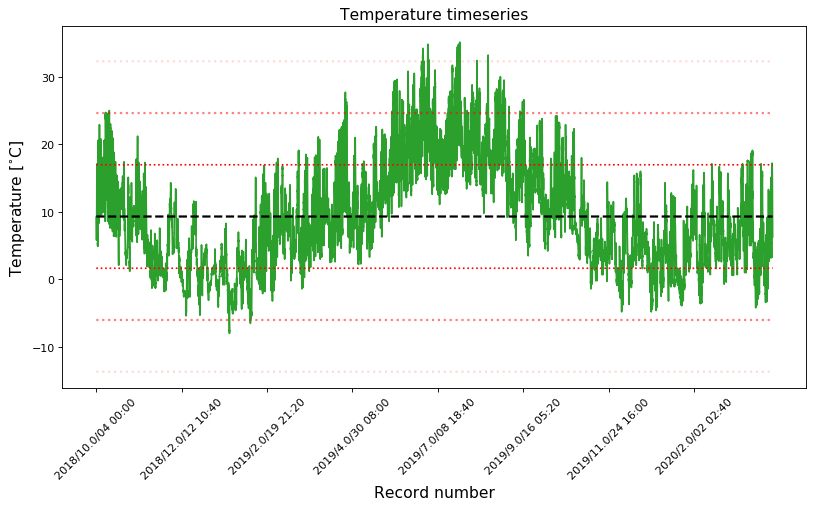

In [109]:
#plotting the pressure field with its mean and std
L=len(temp)
t=np.arange(1,L+1,1)

fig = plt.figure(figsize=(12,6),dpi=80, facecolor='w',edgecolor='k')
plt.plot(t,temp,color='C2')
plt.plot(t,mean_temp*np.ones(L),'--k',linewidth=2)
plt.plot(t,(mean_temp - std_temp)*np.ones(L),':r')
plt.plot(t,(mean_temp + std_temp)*np.ones(L),':r')

plt.plot(t,(mean_temp - 2*std_temp)*np.ones(L),':r',alpha=0.5,linewidth=2)
plt.plot(t,(mean_temp + 2*std_temp)*np.ones(L),':r',alpha=0.5,linewidth=2)

# #extreme events

plt.plot(t,(mean_temp - 3*std_temp)*np.ones(L),':r',alpha=0.15,linewidth=2)
plt.plot(t,(mean_temp + 3*std_temp)*np.ones(L),':r',alpha=0.15,linewidth=2)

plt.title('Temperature timeseries', fontsize=14)
plt.xlabel('Record number', fontsize=14)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=14)
plt.xticks(t[0:L:10000],datestamp[0:L:10000],rotation=45)

# Daily variations: Diurnal cycle

In [212]:
# computing mean temperature over a day
# mean daily temperature - diurnal cycle
ndays = L/144 # 1440 hrs per day. 10 minutes frequency

daily_mean = 0
for i in np.arange(0,ndays,dtype=int):
    daily_mean = daily_mean + temp[i*144 : (i+1)*144]/ndays
    
#plotting 1
# if 1:
#     fig=plt.figure(figsize=(12,4),dpi=80, facecolor='w', edgecolor='k')
#     plt.plot(np.arange(0,24,1./6),daily_mean)

# #plotting 2
# if 1:
#     # choosing an appropriate colormap
#     cmap = mpl.cm.get_cmap('RdBu_r')
    
#     #a way to choose colors
#     min_daily_mean = np.amin(daily_mean)
#     max_daily_mean = np.amax(daily_mean)
#     frac = (daily_mean - min_daily_mean)/(max_daily_mean-min_daily_mean)
    
#     fig=plt.figure(figsize=(12,4),dpi=80,facecolor='w',edgecolor='k')
#     for i in np.arange(0,144):
#         rgba = cmap(frac[i])
#         plt.plot((i)*1/6,daily_mean[i],'o',color='rgba',markersize=6)
        
# plt.grid(alpha=0.5)
# plt.xlim([0,24])
# plt.xlabel('Hours',fontsize=18)
# plt.ylabel(r'Temperature[${\circ}C$]',fontsize=18)
# plt.title('Mean daily variations in temperature',fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)

In [213]:
daily_mean.shape

(144,)

In [214]:
ndays

550.0